# Intel Image Classification

By: Denny Alvito Ginting
dennyginting73@gmail.com

Acknowledge:
The dataset obtained from https://www.kaggle.com/datasets/puneet6060/intel-image-classification

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from sklearn.metrics import f1_score
import keras.backend as K
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
import pathlib

## Loading Dataset

In [ ]:
train_dir = '../input/intel-image-classification/seg_train/seg_train'
train_classes = os.listdir(train_dir)
train_classes

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

## Creating Generator

In [ ]:
size = 299
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    directory = train_dir,
    subset = 'training',
    batch_size = 128,
    seed = 42,
    class_mode = 'categorical',
    target_size = (size, size)
)

valid_generator=datagen.flow_from_directory(
      directory=train_dir,
      subset="validation",
      batch_size=128,
      seed=42,
      class_mode="categorical",
      target_size=(size, size)
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


## Modelling

In [ ]:
tf.keras.backend.clear_session()
backbone_model = tf.keras.applications.InceptionResNetV2(
    include_top = False,
    weights = 'imagenet',
    input_shape=(size,size,3)
)
backbone_model.trainable = False

In [ ]:
# tf.keras.backend.clear_session()
model = Sequential([
    backbone_model,
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 6, 6, 16)          221200    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2320      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('weights.hdf5', monitor= 'val_accuracy', save_best_only=True)

In [ ]:
model.compile(tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 50,
    batch_size = 32,
    callbacks = [checkpoint],
    verbose = 1
)

Epoch 1/50
88/88 [==============================] - 153s 2s/step - loss: 1.1066 - accuracy: 0.5309 - val_loss: 0.3424 - val_accuracy: 0.8948


2022-10-27 08:44:40.985965: W tensorflow/core/framework/op_kernel.cc:1680] Invalid argument: ValueError: callback pyfunc_17 is not found
Traceback (most recent call last):

  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_17 is not found


2022-10-27 08:44:40.986112: W tensorflow/core/kernels/data/generator_dataset_op.cc:107] Error occurred when finalizing GeneratorDataset iterator: Invalid argument: ValueError: callback pyfunc_17 is not found
Traceback (most recent call last):

  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_17 is not found


	 [[{{node PyFunc}}]]


Epoch 2/50
88/88 [==============================] - 142s 2s/step - loss: 0.6445 - accuracy: 0.7584 - val_loss: 0.2708 - val_accuracy: 0.9073
Epoch 3/50
88/88 [==============================] - 144s 2s/step - loss: 0.5009 - accuracy: 0.8182 - val_loss: 0.2368 - val_accuracy: 0.9144
Epoch 4/50
88/88 [==============================] - 129s 1s/step - loss: 0.4408 - accuracy: 0.8477 - val_loss: 0.2315 - val_accuracy: 0.9173
Epoch 5/50
88/88 [==============================] - 129s 1s/step - loss: 0.4083 - accuracy: 0.8615 - val_loss: 0.2541 - val_accuracy: 0.9126
Epoch 6/50
88/88 [==============================] - 129s 1s/step - loss: 0.3974 - accuracy: 0.8617 - val_loss: 0.2429 - val_accuracy: 0.9190
Epoch 7/50
88/88 [==============================] - 129s 1s/step - loss: 0.3625 - accuracy: 0.8762 - val_loss: 0.2492 - val_accuracy: 0.9190
Epoch 8/50
88/88 [==============================] - 129s 1s/step - loss: 0.3594 - accuracy: 0.8771 - val_loss: 0.2469 - val_accuracy: 0.9176
Epoch 9/50
88

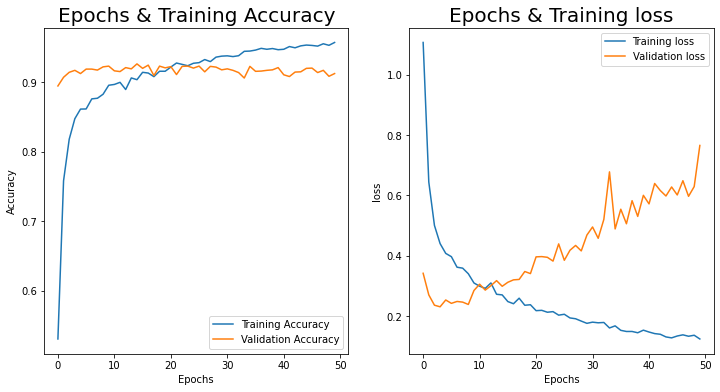

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

ax[0].plot(history.history['accuracy'], '-', label = 'Training Accuracy')
ax[0].plot(history.history['val_accuracy'], '-', label = 'Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize=20)
ax[0].legend(loc='best')

ax[1].plot(history.history['loss'], '-', label = 'Training loss')
ax[1].plot(history.history['val_loss'], '-', label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & Training loss', fontsize=20)
ax[1].legend(loc='best')

plt.show()

## Evaluation

In [ ]:
model.load_weights('weights.hdf5')

In [ ]:
model.evaluate(valid_generator)

22/22 [==============================] - 26s 1s/step - loss: 0.2994 - accuracy: 0.9265


[0.29940158128738403, 0.9265335202217102]

> By taking the best weight after training our model, our model can achieve a high score on validation data (92.6%)

## Deployment

In [ ]:
# Saving Model
export_directory = 'saved_model/'
tf.saved_model.save(model, export_directory)

# Converting to vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_directory)
tflite_model = converter.convert()

# Deploy
tflite_file = pathlib.Path('vegs.tflite')
tflite_file.write_bytes(tflite_model)

2022-10-27 10:41:40.414924: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-10-27 10:43:22.894066: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2022-10-27 10:43:22.894114: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2022-10-27 10:43:22.894131: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored change_concat_input_ranges.
2022-10-27 10:43:22.896812: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: saved_model/
2022-10-27 10:43:23.083199: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with tags { serve }
2022-10-27 10:43:23.084933: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: saved_model/
2022-10-27 10:43:23.916336: I tensorflow/cc/saved_model/loader.cc:229] Resto

218182536